# KNN & Clustering

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

import sklearn
from skompiler import skompile

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.metrics import mean_squared_error,r2_score

In [4]:
def dendogramPlot(X):
    plt.figure(figsize=(10, 8))
    plt.title('Hiyerarşik Kümeleme - Dendogram')
    plt.xlabel('Indexler')
    plt.ylabel('Uzaklık')
    dendrogram(X,leaf_font_size=10);

In [72]:
def knn_reg_kars(knn_reg_B,knn_reg_A):
    print("KNN Before Tuning score MSE : ", knn_reg_B )
    print("KNN After Tuning score MSE :", knn_reg_A)

In [78]:
def rmse_rmsecv():
    RMSE = [] 
    RMSE_CV = []
    for k in range(10):
        k = k+1
        knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
        y_pred = knn_model.predict(X_train) 
        rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
        rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
        RMSE.append(rmse) 
        RMSE_CV.append(rmse_cv)
        print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

In [54]:
def rmse(knn_model):
    RMSE = [] 

    for k in range(10):
        k = k+1
        knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
        y_pred = knn_model.predict(X_train) 
        rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
        RMSE.append(rmse) 
        print("k =" , k , "için RMSE değeri: ", rmse)

In [27]:
def accurarcy_score_check(accscorebefore, accscoreafter):
    print("Before Tuning score : ", accscorebefore )
    print("After Tuning score :", accscoreafter)
    
    if(accscoreafter > accscorebefore):
        print("İyileşme oldu : ", accscoreafter-accscorebefore)

In [28]:
def impfeature_plot(x):
    Importance = pd.DataFrame({"Importance": x.feature_importances_*100},
                         index = X_train.columns)
    Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")
    plt.xlabel("Değişken Önem Düzeyleri")

# Classification

In [4]:
data =pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [5]:
data.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575
reason,HomeImp,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon,DebtCon,DebtCon,...,HomeImp,DebtCon,DebtCon,NaN,HomeImp,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon
job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Self,Self,Self,Self,Self,Self,Self,Self,Self,Self


In [6]:
# dummy

dummy_variable=pd.get_dummies(df[['reason','job']])

y=df['bad']
X_ = df.drop(['bad','reason','job'],axis=1).astype('float64')
X = pd.concat((X_,dummy_variable),axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,
                                                    random_state=42)

## KNN

In [82]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [84]:
y_pred = knn_model.predict(X_test)

In [85]:
before_accuracy_score=accuracy_score(y_test, y_pred)
before_accuracy_score

0.9141914191419142

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       554
           1       0.50      0.10      0.16        52

    accuracy                           0.91       606
   macro avg       0.71      0.54      0.56       606
weighted avg       0.89      0.91      0.89       606



0'ları iyi öğrenmiş , 1leri iyi öğrenemiş

### Model Tuning

In [13]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [18]:
knn_params = {"n_neighbors": np.arange(1,40),
             "metric":["minkowski","euclidean","manhattan"]}

In [19]:
knn = KNeighborsClassifier()

In [20]:
knn_cv = GridSearchCV(knn, knn_params,cv=10)

In [21]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [22]:
print("En iyi skor : " + str(knn_cv.best_score_))
print("En iyi parametreler : " + str(knn_cv.best_params_))

En iyi skor : 0.9128908200978924
En iyi parametreler : {'metric': 'minkowski', 'n_neighbors': 14}


In [86]:
knn_tuned = KNeighborsClassifier(n_neighbors=14,metric="minkowski")
knn_tuned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [87]:
y_pred=knn_tuned.predict(X_test)

In [88]:
after_accuracy_score = accuracy_score(y_test,y_pred)
after_accuracy_score

0.9174917491749175

In [29]:
accurarcy_score_check(before_accuracy_score, after_accuracy_score)

Before Tuning score :  0.9141914191419142
After Tuning score : 0.9174917491749175
İyileşme oldu :  0.0033003300330033403


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       554
           1       1.00      0.04      0.07        52

    accuracy                           0.92       606
   macro avg       0.96      0.52      0.52       606
weighted avg       0.92      0.92      0.88       606



***

# Regression

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
data = pd.read_excel("HW_Data_Set.xlsx")
df=data.copy()
df = df.replace('?',np.NaN)
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df.select_dtypes(include=['float64','int64'])
df.select_dtypes(include=["object"]).T

In [ ]:
y_dt = df['90_target']

dummy_dt =  pd.get_dummies(df['ind_109'])

X_dt = df.drop(["20_target","50_target","90_target", "ind_420", "ind_422"],axis=1)
X_dt.head(0)

X_dt =pd.concat([X_dt,dummy_dt],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.30,
                                               random_state=42)

# KNN 

In [43]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [44]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [45]:
knn_model.n_neighbors

5

In [46]:
y_pred = knn_model.predict(X_test)
knn_reg_B = np.sqrt(mean_squared_error(y_test, y_pred))
knn_reg_B

0.2908959643003055

In [56]:
rmse(knn_model)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  0.17652612579394217
k = 3 için RMSE değeri:  0.2026733511148534
k = 4 için RMSE değeri:  0.21955159685759415
k = 5 için RMSE değeri:  0.23315789978530566
k = 6 için RMSE değeri:  0.24004412824822988
k = 7 için RMSE değeri:  0.24497021539130118
k = 8 için RMSE değeri:  0.249002080551509
k = 9 için RMSE değeri:  0.2527953744562653
k = 10 için RMSE değeri:  0.25514535100926894


### Model Tuning

In [48]:
knn_params = {"n_neighbors": np.arange(1,20,1),
             "weights":["uniform","distance"],
             "metric":["minkowski","euclidean","manhattan"]}

In [49]:
knn = KNeighborsRegressor()

In [50]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [51]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [63]:
print("n_neighbors: ",knn_cv_model.best_params_["n_neighbors"])
print("weights: ",knn_cv_model.best_params_["weights"])
print("metric: ",knn_cv_model.best_params_["metric"])

n_neighbors:  19
weights:  distance
metric:  manhattan


In [65]:
knn_tuned = KNeighborsRegressor(n_neighbors = 19, 
                                weights="distance", 
                                metric="manhattan")
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=19, weights='distance')

In [67]:
y_pred = knn_model.predict(X_test)

In [69]:
knn_reg_A = np.sqrt(mean_squared_error(y_test, y_pred))
knn_reg_A

0.2832799406108298

In [73]:
knn_reg_kars(knn_reg_B,knn_reg_A)

KNN Before Tuning score MSE :  0.2908959643003055
KNN After Tuning score MSE : 0.2832799406108298


In [80]:
rmse_rmsecv()

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  0.35504413532428475
k = 2 için RMSE değeri:  0.17652612579394217 RMSE_CV değeri:  0.30544005469206015
k = 3 için RMSE değeri:  0.2026733511148534 RMSE_CV değeri:  0.29432830712799257
k = 4 için RMSE değeri:  0.21955159685759415 RMSE_CV değeri:  0.29197010344308366
k = 5 için RMSE değeri:  0.23315789978530566 RMSE_CV değeri:  0.2877921007904749
k = 6 için RMSE değeri:  0.24004412824822988 RMSE_CV değeri:  0.2861658474394829
k = 7 için RMSE değeri:  0.24497021539130118 RMSE_CV değeri:  0.28499112929375886
k = 8 için RMSE değeri:  0.249002080551509 RMSE_CV değeri:  0.2841098330980656
k = 9 için RMSE değeri:  0.2527953744562653 RMSE_CV değeri:  0.282059258142665
k = 10 için RMSE değeri:  0.25514535100926894 RMSE_CV değeri:  0.2828207271045601


# Clustering K-MEANS

#### PCA

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [31]:
data = pd.read_excel("HW_Data_Set.xlsx")
df=data.copy()
df = df.replace('?',np.NaN)
df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [38]:
dummy_data = pd.get_dummies(df)

In [39]:
dummy_data=dummy_data.drop(["ind_420", "ind_422"],axis=1)

In [11]:
dummy_data.head(0)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,ind_109_GREEN,ind_109_RED


In [34]:
dummy_dt =  pd.get_dummies(df['ind_109'])
X_dt = df.drop(["20_target","50_target","90_target", "ind_420", "ind_422","ind_109"],axis=1)
y_dt = df['90_target']

X_dt =pd.concat([X_dt, dummy_dt],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X_dt,y_dt,
                                               test_size=0.30,
                                               random_state=42)

In [14]:
X_train.shape

(4316, 133)

In [36]:
pca = PCA(n_components=15)

In [37]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[ 6.36892625,  6.20306004, -2.7904119 , -0.2887686 ,  1.98831197,
        -1.83293873,  1.94001123,  0.28451797,  1.30990343, -0.50213213,
        -1.60964591,  1.8130243 , -1.27702369, -0.3438913 , -0.52397549]])

In [111]:
X_reduced_test = pca.fit_transform(scale(X_test))
X_reduced_test[0:1,:]

array([[ 1.7806999 , -1.14337829,  0.26193841, -0.10829845,  2.07369326,
         0.02473318, -0.37574454, -0.27476259,  0.26696519,  0.53209516,
        -0.64390397,  0.53948347,  0.88605644, -0.25673205, -0.85027838]])

In [41]:
dataKmeans = pca.fit_transform(scale(dummy_data))

In [112]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)

array([14.9 , 27.24, 35.69, 43.15, 50.25, 57.13, 63.67, 69.6 , 74.93,
       80.17, 84.71, 89.09, 92.84, 96.15, 99.35])

In [113]:
#Kmeans

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans = KMeans(n_clusters=4)

In [48]:
k_fit = kmeans.fit(dataKmeans)

In [50]:
k_fit.n_clusters

4

In [51]:
k_fit.cluster_centers_

array([[ 9.10013   ,  1.29828368,  0.79182345,  0.68538304, -0.34232602,
         0.0560915 , -0.04829736,  0.08557247, -0.06262355,  0.06835217,
        -0.24384151, -0.20085597,  0.13151819, -0.03710891,  0.07644035],
       [-9.21482994, -0.64632921,  0.66935018,  1.0262435 , -0.26098914,
         0.05470075, -0.05523645,  0.11389335,  0.20583555,  0.04906113,
         0.03902169, -0.28732475,  0.17777404, -0.07542257, -0.0299468 ],
       [ 1.6123139 , -3.05091608, -0.74457217, -0.38914626,  0.52945047,
         0.07990067,  0.30239929, -0.03154217, -0.12676127, -0.07227032,
        -0.12527682,  0.16772595, -0.09321803, -0.14325754,  0.06933359],
       [-2.43920192,  3.37379531, -0.33448433, -1.01431988, -0.15247327,
        -0.20408461, -0.30420344, -0.1365859 ,  0.04431533, -0.01077606,
         0.35438028,  0.21510929, -0.15360108,  0.28784449, -0.13508297]])

In [52]:
k_fit.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [53]:
kmeans = KMeans(n_clusters=8)
k_fit = kmeans.fit(dataKmeans)
kumeler = k_fit.labels_
merkezler = k_fit.cluster_centers_

In [54]:
dataKmeans = pd.DataFrame(dataKmeans)

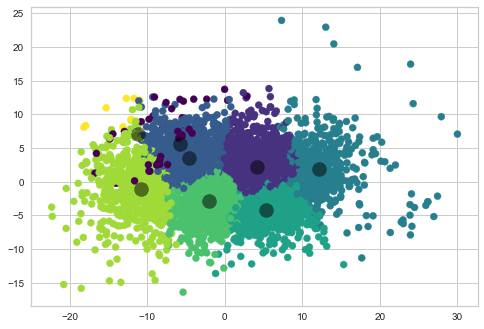

In [144]:
plt.scatter(dataKmeans.iloc[:,0], dataKmeans.iloc[:,1], c=kumeler, s=50, cmap="viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5)

## Optimum Küme Sayısının Belirlenmesi

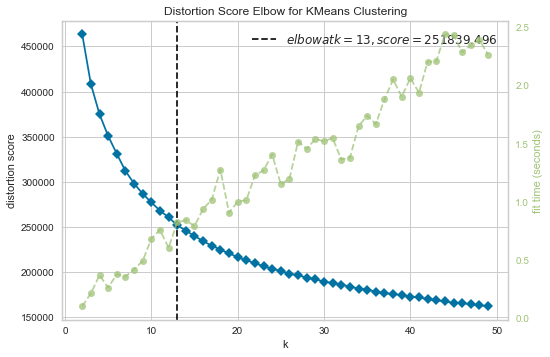

In [134]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer( kmeans, k=(2,50))
visualizer.fit(dataKmeans)
visualizer.poof()

## Hiyerarşik Kümeleme


In [6]:
from scipy.cluster.hierarchy import dendrogram

In [55]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(dataKmeans, "complete")
hc_average = linkage(dataKmeans, "average")
hc_centroid = linkage(dataKmeans, "centroid")

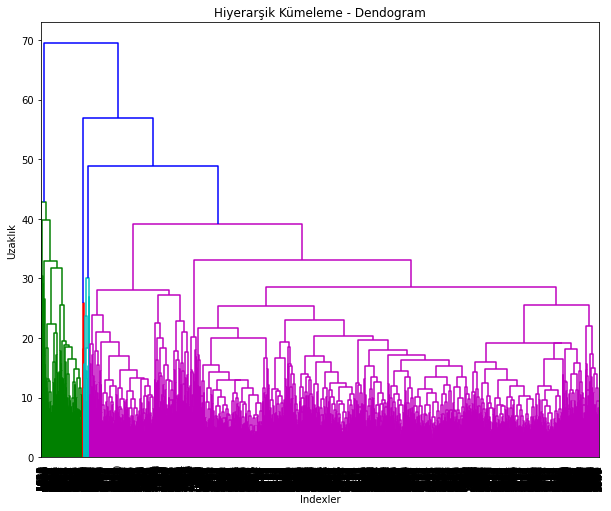

In [56]:
dendogramPlot(hc_complete)

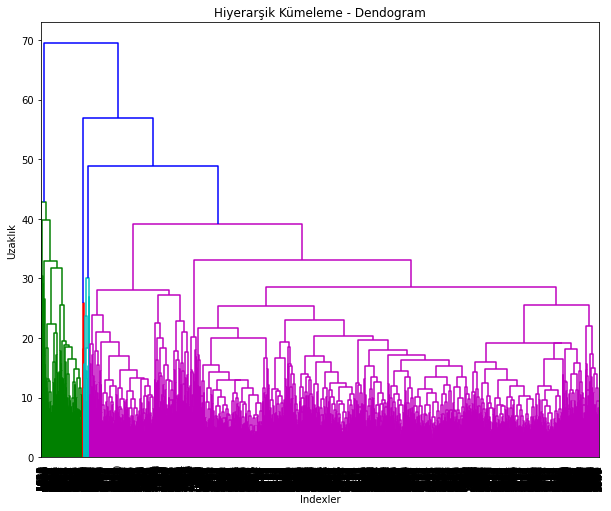

In [57]:
dendogramPlot(hc_centroid)